In [1]:
from google.colab import files
uploaded = files.upload()

Saving household_power_consumption.txt to household_power_consumption.txt


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet
df = pd.read_csv("./household_power_consumption.txt", sep =";", parse_dates = {"date" : ["Date","Time"]}, infer_datetime_format=True, low_memory=False, na_values=["nan","?"], index_col = ["date"]).reset_index()
df.fillna(df.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [4]:
df.head()

,date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   date                   datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [6]:
df.isna().sum()

date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [7]:
df.date = pd.to_datetime(df['date'])

In [9]:
df.set_index('date', inplace=True)

In [10]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [11]:
df_daily = df.resample('D').mean()

In [12]:
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


In [13]:
df_daily.fillna(df_daily.mean())

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972
...,...,...,...,...,...,...,...
2010-11-22,1.417733,0.098857,240.197118,6.014167,3.371528,1.465278,7.038889
2010-11-23,1.095511,0.095451,240.575528,4.674444,1.299306,0.318056,5.285417
2010-11-24,1.247394,0.091986,240.030965,5.249583,0.761111,1.977778,8.488889


Text(0.5, 1.0, 'upsample')

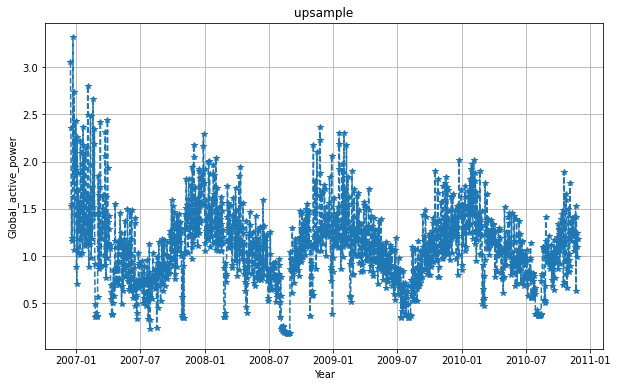

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily['Global_active_power'], '--', marker='*',)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Global_active_power')
plt.title('upsample')

In [15]:
from scipy.stats import pearsonr

In [21]:
list1 = df['Global_active_power']
list2 = df['Global_reactive_power']

In [22]:
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: 0.25


In [28]:
list1 = df['Voltage']
list2 = df['Global_intensity']

In [29]:
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: -0.41


In [42]:
train = df_daily.iloc[0:1077]

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1077 entries, 2006-12-16 to 2009-11-26
Freq: D
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    1077 non-null   float64
 1   Global_reactive_power  1077 non-null   float64
 2   Voltage                1077 non-null   float64
 3   Global_intensity       1077 non-null   float64
 4   Sub_metering_1         1077 non-null   float64
 5   Sub_metering_2         1077 non-null   float64
 6   Sub_metering_3         1077 non-null   float64
dtypes: float64(7)
memory usage: 67.3 KB


In [44]:
test = df_daily.iloc[1077:]

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2009-11-27 to 2010-11-26
Freq: D
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    365 non-null    float64
 1   Global_reactive_power  365 non-null    float64
 2   Voltage                365 non-null    float64
 3   Global_intensity       365 non-null    float64
 4   Sub_metering_1         365 non-null    float64
 5   Sub_metering_2         365 non-null    float64
 6   Sub_metering_3         365 non-null    float64
dtypes: float64(7)
memory usage: 22.8 KB


In [61]:
df = train.rename(columns={'date':'dt', 'Global_active_power':'y'})

In [62]:
df.head()

,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


In [48]:
model = Prophet()